# **Topic - Image Segmentation Using Clustering**




###    **Importing Libraries for Data Processing, Clustering, and Visualization**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import pairwise_distances
import pandas as pd
from PIL import Image
import os
from scipy.ndimage import gaussian_filter
from scipy.linalg import eigh
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples


### **Loading Dataset**
Dataset Link - https://www.kaggle.com/datasets/faizalkarim/flood-area-segmentation

In [2]:
metadata = pd.read_csv(r"C:\Users\UseR\Downloads\archive (3)\metadata.csv")


### **Seting Number of Images to Visualize**

In [3]:
num_images_to_visualize = 4

### **Defining Function to Downsample Images**

In [4]:
def downsample_image(image_np, scale_factor=0.25):
    width = int(image_np.shape[1] * scale_factor)
    height = int(image_np.shape[0] * scale_factor)
    return cv2.resize(image_np, (width, height))

### **Calculating Optimal k for K-Means Clustering Using the Elbow Method**

In [6]:
def calculate_optimal_k_kmeans(data, max_k=10):
    inertia_list = []
    optimal_k_list = []
    
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia_list.append(kmeans.inertia_)
        optimal_k_list.append(k)

    plt.figure(figsize=(8, 5))
    plt.plot(optimal_k_list, inertia_list, marker='o')
    plt.title('Elbow Method for Optimal k in K-Means')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.grid()
    plt.show()

    deltas = np.diff(inertia_list)
    double_deltas = np.diff(deltas)
    optimal_k = np.argmin(double_deltas) + 2
    return optimal_k

### **Calculatig Optimal k for Gaussian Mixture Model Using Bayesian Information Criterion**

In [7]:
def calculate_optimal_k_gmm(data, max_k=10):
    bics = []
    
    for k in range(1, max_k + 1):
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(data)
        bics.append(gmm.bic(data))
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), bics, marker='o')
    plt.title('BIC for Optimal k in GMM')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('BIC')
    plt.grid()
    plt.show()
    
    optimal_k = np.argmin(bics) + 1
    return optimal_k


### **Ratio Cut Clustering Using Eigenvalues**

In [ ]:
def ratio_cut_clustering(similarity_matrix, n_clusters):
    n = similarity_matrix.shape[0]
    degree_matrix = np.diag(similarity_matrix.sum(axis=1))
    laplacian_matrix = degree_matrix - similarity_matrix
    eigenvalues, eigenvectors = eigh(laplacian_matrix, subset_by_index=[0, n_clusters-1])
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(eigenvectors[:, :n_clusters]).astype(int)
    
   
    plt.figure(figsize=(8, 5))
    plt.plot(range(n_clusters), eigenvalues[:n_clusters], marker='o')
    plt.title('Eigenvalues from Ratio Cut Clustering')
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue')
    plt.grid()
    plt.show()
    
    return labels

### **Hyperparameter Tuning of DBSCAN Using Silhouette Score**

In [ ]:
def dbscan_hyperparameter_tuning(vectorized):
    best_sil_score = -1
    best_eps, best_min_samples = 0.5, 10
    eps_values = np.linspace(0.2, 1.0, 5)
    min_samples_values = [5, 10, 15, 20]
    silhouette_scores = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels_dbscan = dbscan.fit_predict(vectorized)
            if len(set(labels_dbscan)) > 1:
                sil_dbscan = silhouette_score(vectorized, labels_dbscan)
                silhouette_scores.append((eps, min_samples, sil_dbscan))
                if sil_dbscan > best_sil_score:
                    best_sil_score = sil_dbscan
                    best_eps = eps
                    best_min_samples = min_samples

    
    eps_vals, min_samples_vals, sil_scores = zip(*silhouette_scores)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(eps_vals, min_samples_vals, c=sil_scores, cmap='viridis', marker='o')
    plt.colorbar(scatter, label='Silhouette Score')
    plt.title('DBSCAN Hyperparameter Tuning')
    plt.xlabel('Epsilon')
    plt.ylabel('Minimum Samples')
    plt.grid()
    plt.show()

    return best_eps, best_min_samples

### **Visualizing Images and Evaluating Clustering Metrics for K-Means, GMM, Ratio Cut, and DBSCAN**

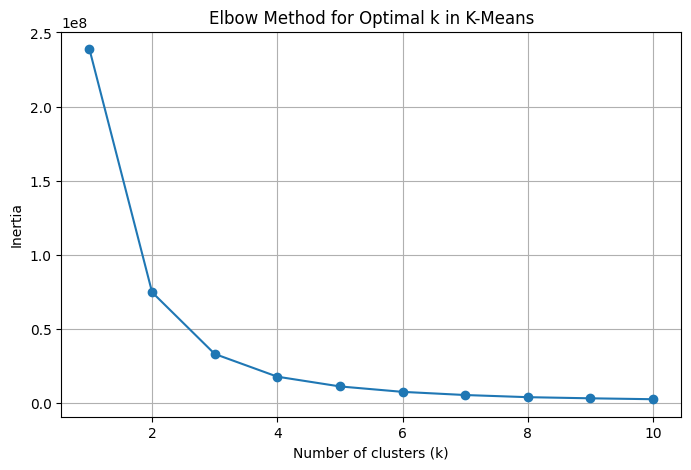

K-Means Metrics for Image 1:
Optimal k: 9, Silhouette Score: 0.5574504299096387, Calinski-Harasz Score: 180675.01824541626, Davies-Bouldin Score: 0.48347742453442144



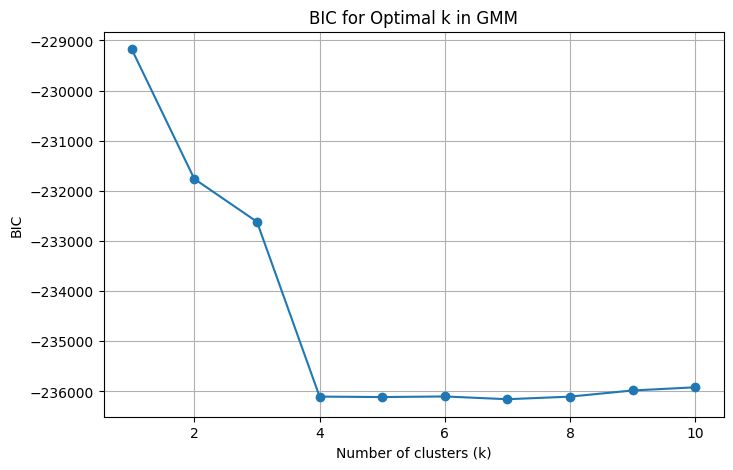

GMM Metrics for Image 1:
Optimal k: 7, Silhouette Score: 0.5458611678461961, Calinski-Harasz Score: 122653.730539263, Davies-Bouldin Score: 0.49154483441058705



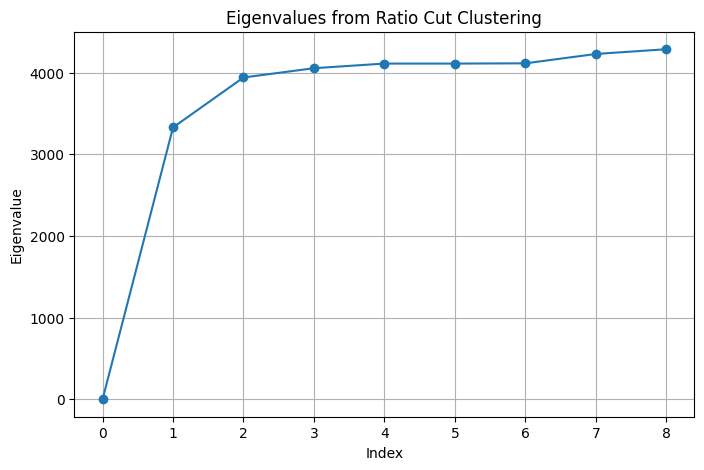

Ratio Cut Metrics for Image 1:
Silhouette Score: 0.5182281873170835, Calinski-Harasz Score: 1674.9016522379281, Davies-Bouldin Score: 0.32190305409126985



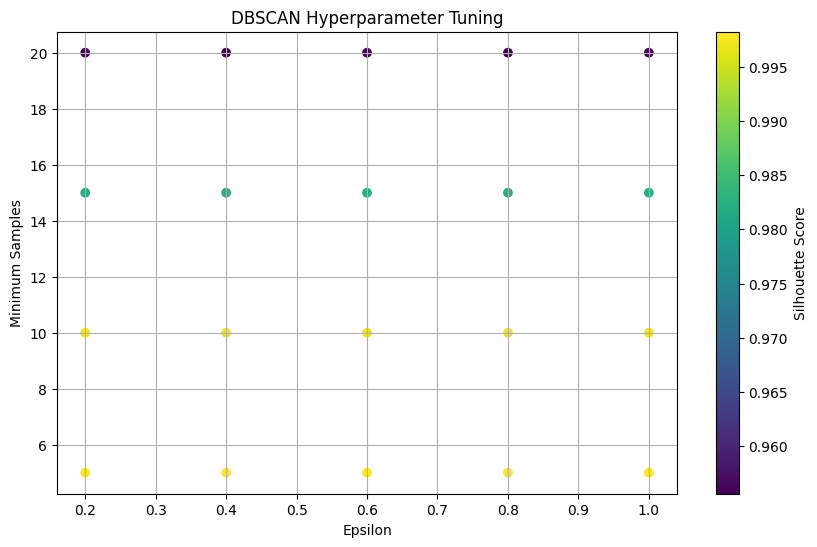

DBSCAN Metrics for Image 1:
Best eps: 0.2, Best min_samples: 5
Silhouette Score: 0.9982094663507294, Calinski-Harasz Score: 40096.09776760765, Davies-Bouldin Score: 6.229817489320566



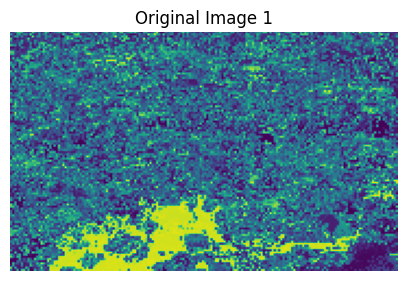

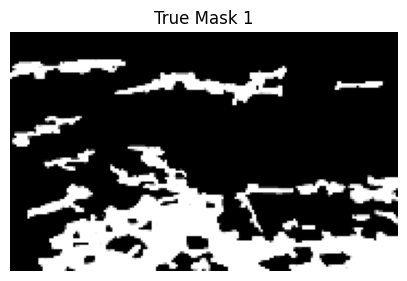

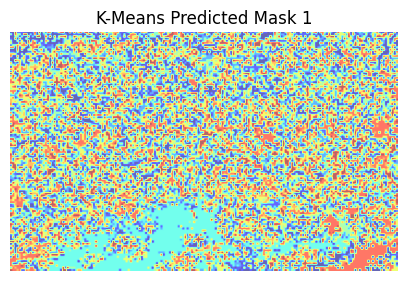

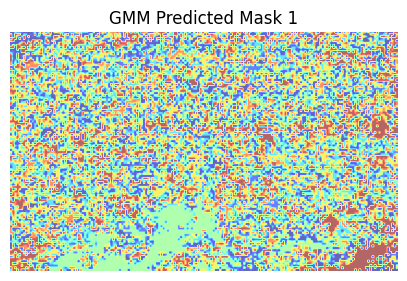

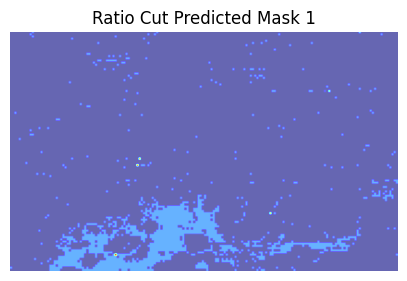

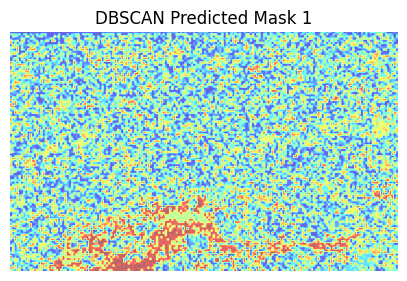

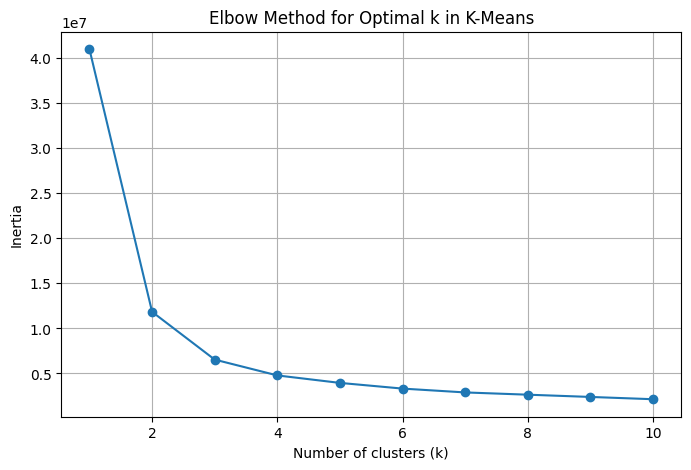

K-Means Metrics for Image 2:
Optimal k: 9, Silhouette Score: 0.3637627680449388, Calinski-Harasz Score: 12049.11237405831, Davies-Bouldin Score: 0.9565311812299415



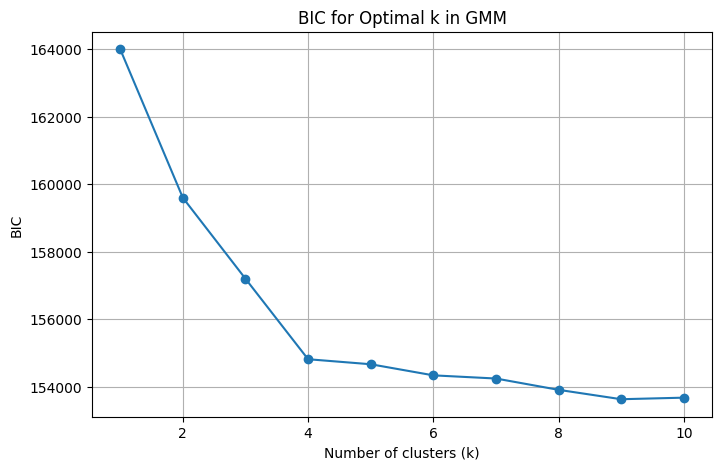

GMM Metrics for Image 2:
Optimal k: 9, Silhouette Score: 0.16321758689174426, Calinski-Harasz Score: 5005.724734883194, Davies-Bouldin Score: 1.798721763990855



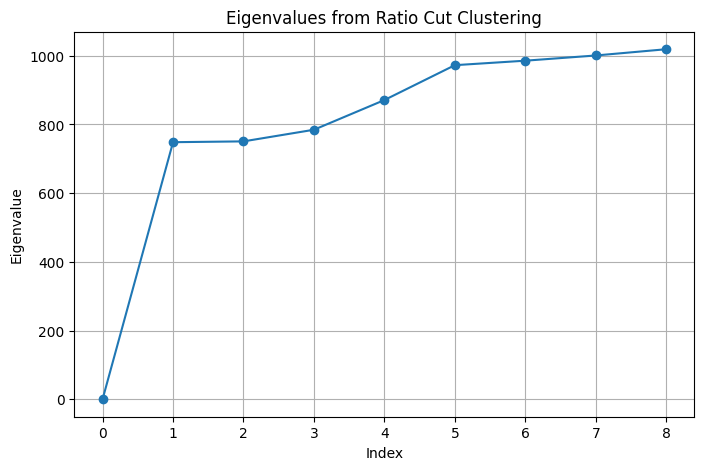

Ratio Cut Metrics for Image 2:
Silhouette Score: 0.3025992511551214, Calinski-Harasz Score: 6.948526169774102, Davies-Bouldin Score: 0.3380099571029464



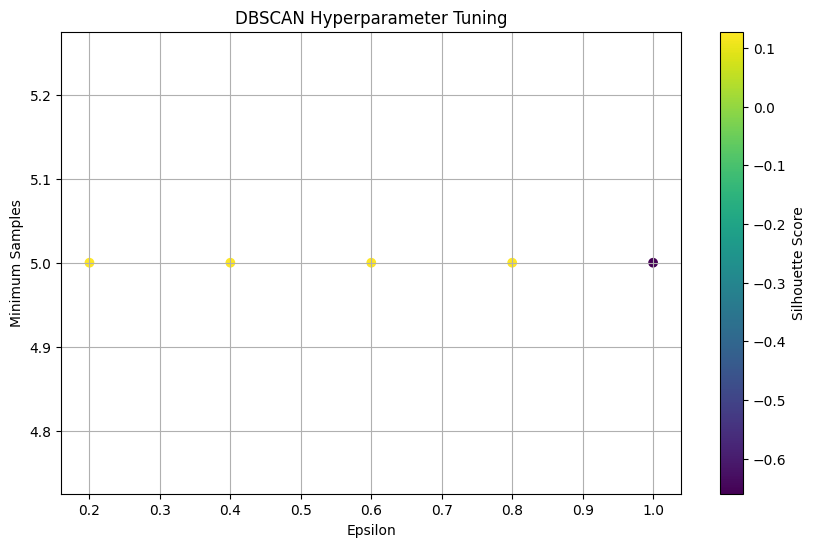

DBSCAN Metrics for Image 2:
Best eps: 0.2, Best min_samples: 5
Silhouette Score: 0.12791540537290402, Calinski-Harasz Score: 13.555702226202799, Davies-Bouldin Score: 0.5774489127968454



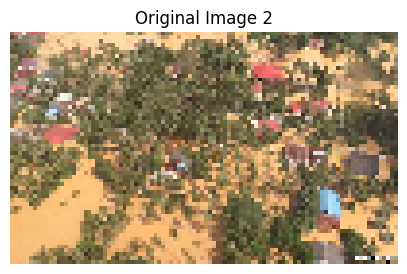

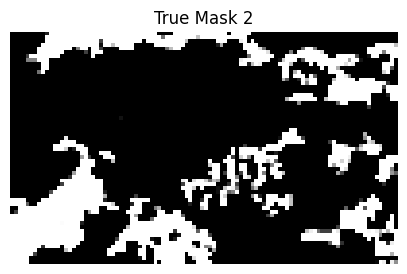

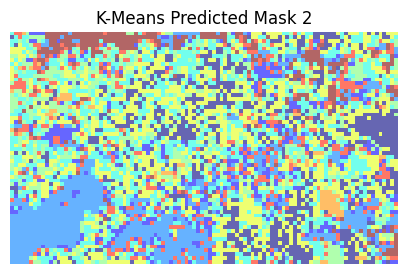

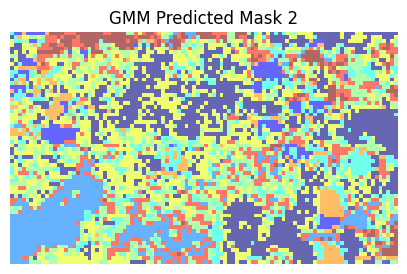

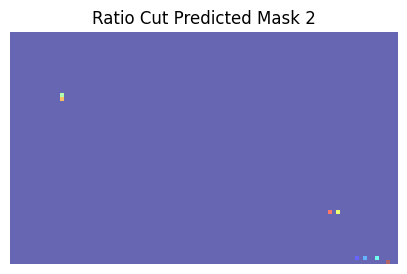

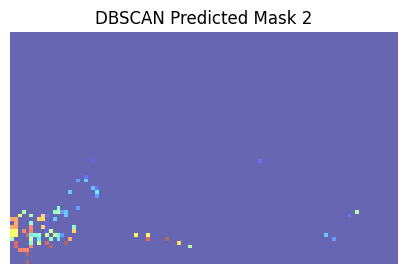

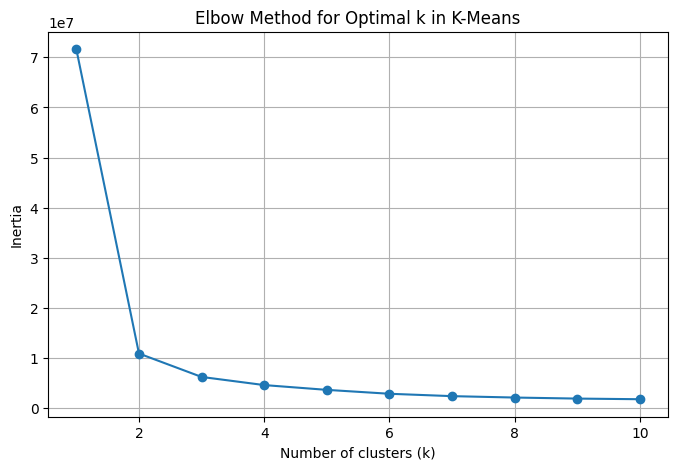

K-Means Metrics for Image 3:
Optimal k: 8, Silhouette Score: 0.40158203645733137, Calinski-Harasz Score: 44361.336542997335, Davies-Bouldin Score: 0.8332880147951028



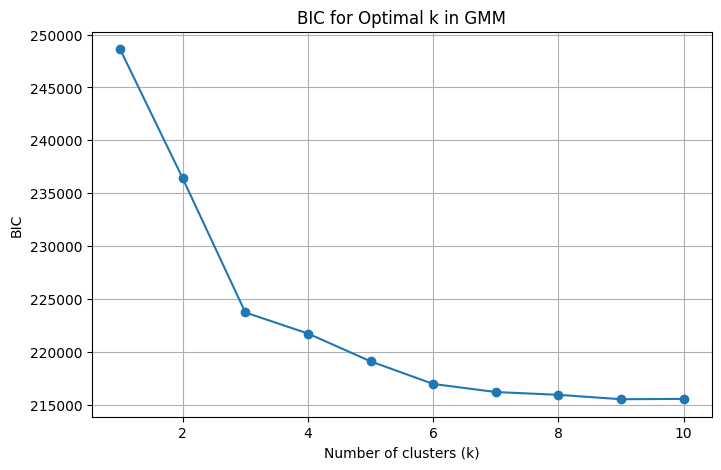

GMM Metrics for Image 3:
Optimal k: 9, Silhouette Score: 0.19606385498422696, Calinski-Harasz Score: 18516.826259936908, Davies-Bouldin Score: 1.5299548269610435



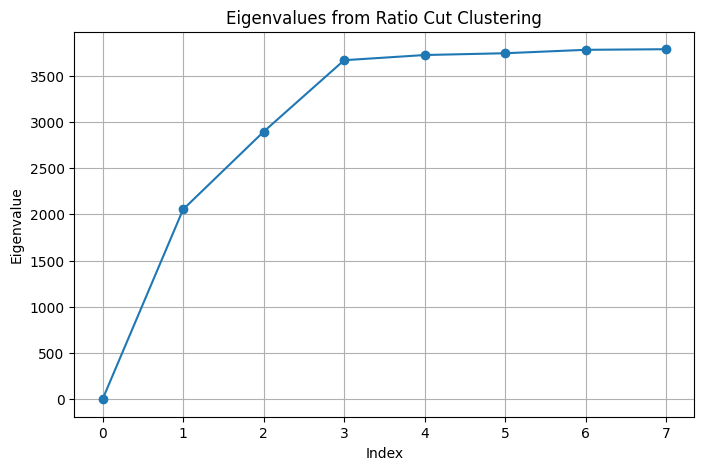

Ratio Cut Metrics for Image 3:
Silhouette Score: 0.46484020150273836, Calinski-Harasz Score: 6463.017778196274, Davies-Bouldin Score: 0.363679029507029



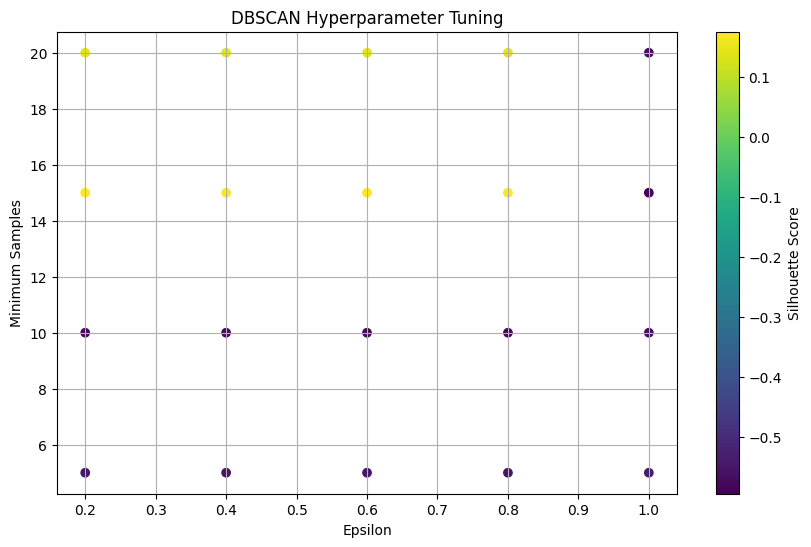

DBSCAN Metrics for Image 3:
Best eps: 0.2, Best min_samples: 15
Silhouette Score: 0.17490429333303342, Calinski-Harasz Score: 70.67561911756385, Davies-Bouldin Score: 0.5496142931416517



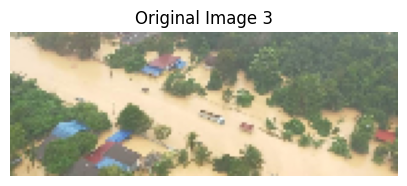

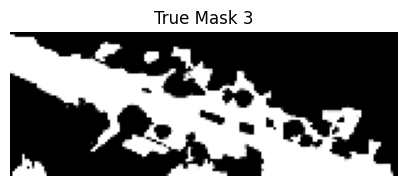

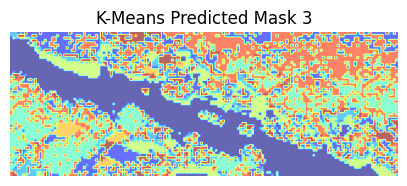

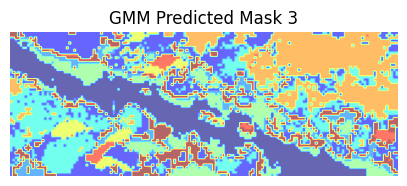

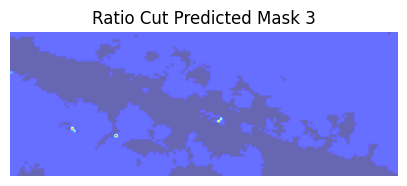

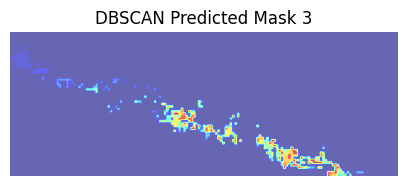

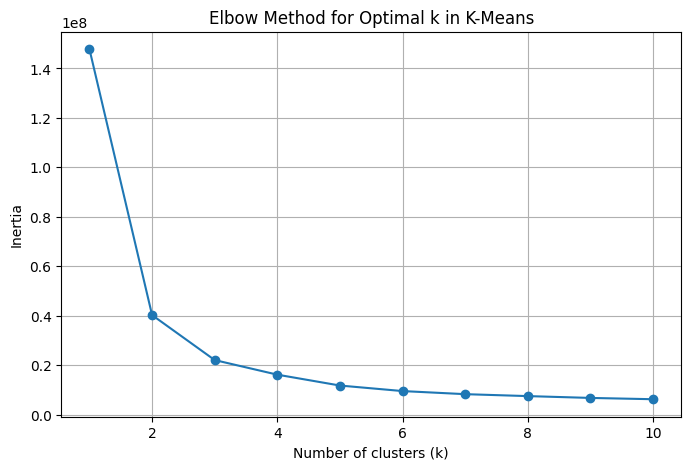

K-Means Metrics for Image 4:
Optimal k: 8, Silhouette Score: 0.42941512749408633, Calinski-Harasz Score: 31014.29031319732, Davies-Bouldin Score: 0.8883750521266893



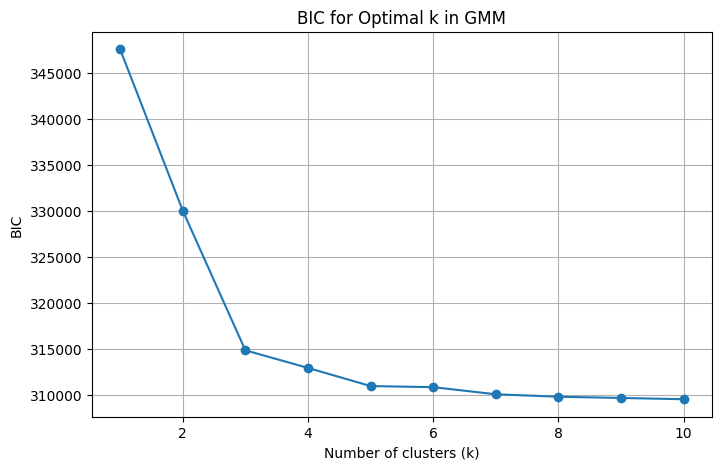

GMM Metrics for Image 4:
Optimal k: 10, Silhouette Score: 0.26095868210856166, Calinski-Harasz Score: 14568.377079924405, Davies-Bouldin Score: 1.6457559682904013



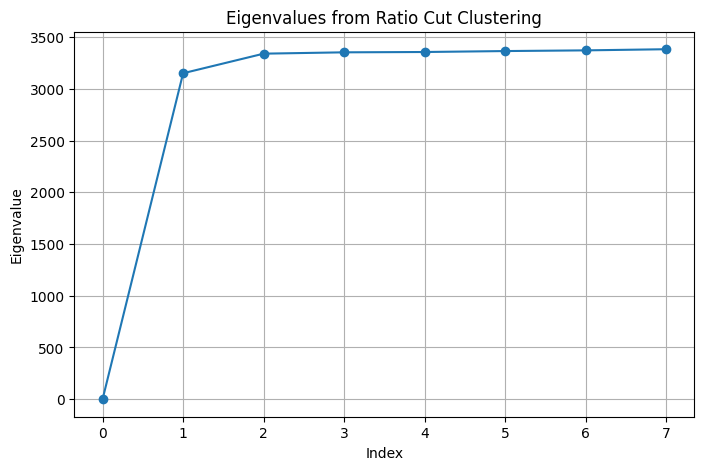

Ratio Cut Metrics for Image 4:
Silhouette Score: 0.5214793848019467, Calinski-Harasz Score: 4412.912891622366, Davies-Bouldin Score: 0.37095847054684006



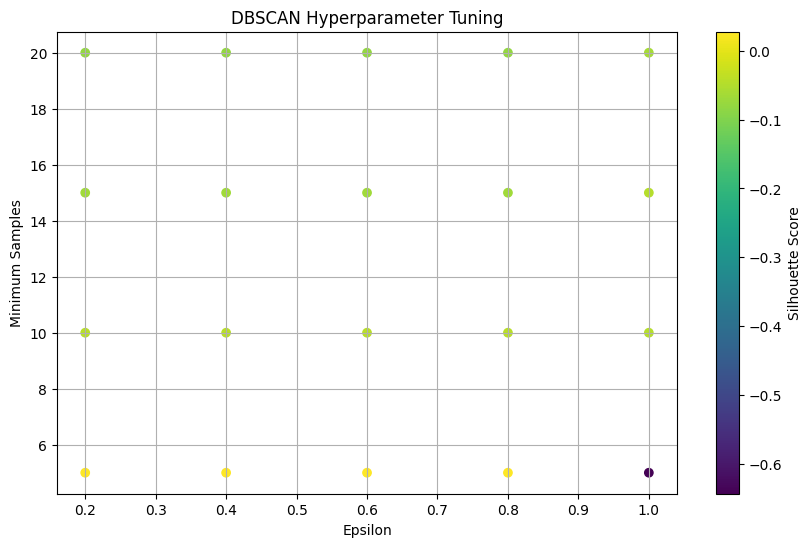

DBSCAN Metrics for Image 4:
Best eps: 0.2, Best min_samples: 5
Silhouette Score: 0.027577534765449198, Calinski-Harasz Score: 13.773772394589752, Davies-Bouldin Score: 0.7665059304163326



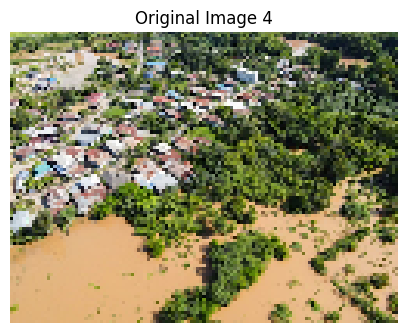

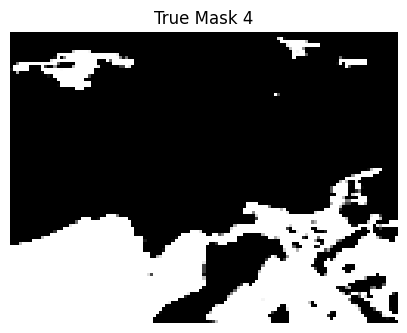

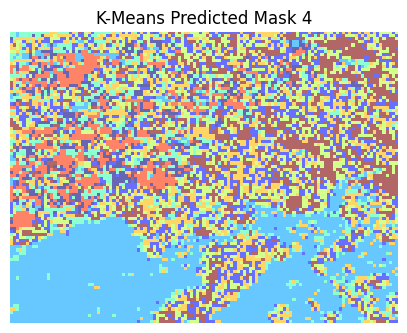

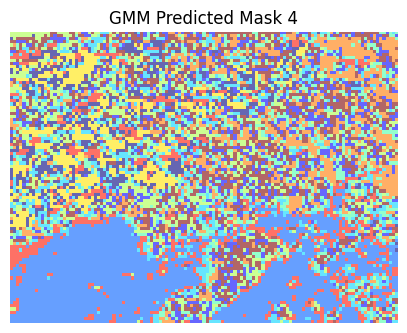

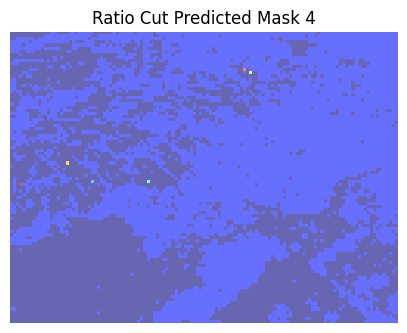

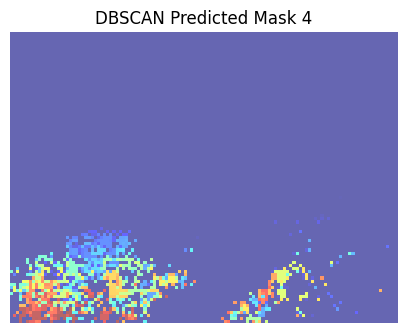

In [ ]:
for i in range(num_images_to_visualize):
    image_name = metadata.iloc[i]['Image']
    mask_name = metadata.iloc[i]['Mask']

    image_path = os.path.join(r"C:\Users\UseR\Downloads\archive (3)\Image", image_name)
    mask_path = os.path.join(r"C:\Users\UseR\Downloads\archive (3)\Mask", mask_name)

    try:
        image = Image.open(image_path)
        image_np = np.array(image)
        image_np = downsample_image(image_np, scale_factor=0.2)

        if len(image_np.shape) == 3:
            vectorized = image_np.reshape((-1, 3))
        elif len(image_np.shape) == 2:
            vectorized = np.stack((image_np,) * 3, axis=-1).reshape((-1, 3))
        else:
            raise ValueError("Unsupported image format.")

        mask = Image.open(mask_path)
        mask_np = np.array(mask)
        mask_np = downsample_image(mask_np, scale_factor=0.2)

    except FileNotFoundError:
        print(f"File not found: {image_name} or {mask_name}, skipping...")
        continue

    
    optimal_k_kmeans = calculate_optimal_k_kmeans(vectorized)
    kmeans = KMeans(n_clusters=optimal_k_kmeans, random_state=42)
    labels_kmeans = kmeans.fit_predict(vectorized)

    sil_kmeans = silhouette_score(vectorized, kmeans.labels_)
    ch_kmeans = calinski_harabasz_score(vectorized, kmeans.labels_)
    db_kmeans = davies_bouldin_score(vectorized, kmeans.labels_)

    print(f"K-Means Metrics for Image {i + 1}:")
    print(f"Optimal k: {optimal_k_kmeans}, Silhouette Score: {sil_kmeans}, Calinski-Harasz Score: {ch_kmeans}, Davies-Bouldin Score: {db_kmeans}\n")

    
    optimal_k_gmm = calculate_optimal_k_gmm(vectorized)
    gmm = GaussianMixture(n_components=optimal_k_gmm, random_state=42)
    gmm.fit(vectorized)
    labels_gmm = gmm.predict(vectorized)

    sil_gmm = silhouette_score(vectorized, labels_gmm)
    ch_gmm = calinski_harabasz_score(vectorized, labels_gmm)
    db_gmm = davies_bouldin_score(vectorized, labels_gmm)

    print(f"GMM Metrics for Image {i + 1}:")
    print(f"Optimal k: {optimal_k_gmm}, Silhouette Score: {sil_gmm}, Calinski-Harasz Score: {ch_gmm}, Davies-Bouldin Score: {db_gmm}\n")

    
    distances = pairwise_distances(vectorized)
    similarity_matrix = np.exp(-distances ** 2 / (2 * np.mean(distances) ** 2))
    labels_ratio_cut = ratio_cut_clustering(similarity_matrix, optimal_k_kmeans)

    sil_ratio_cut = silhouette_score(vectorized, labels_ratio_cut)
    ch_ratio_cut = calinski_harabasz_score(vectorized, labels_ratio_cut)
    db_ratio_cut = davies_bouldin_score(vectorized, labels_ratio_cut)

    print(f"Ratio Cut Metrics for Image {i + 1}:")
    print(f"Silhouette Score: {sil_ratio_cut}, Calinski-Harasz Score: {ch_ratio_cut}, Davies-Bouldin Score: {db_ratio_cut}\n")

    
    best_eps, best_min_samples = dbscan_hyperparameter_tuning(vectorized)
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    labels_dbscan = dbscan.fit_predict(vectorized)

    if len(set(labels_dbscan)) > 1:
        sil_dbscan = silhouette_score(vectorized, labels_dbscan)
        ch_dbscan = calinski_harabasz_score(vectorized, labels_dbscan)
        db_dbscan = davies_bouldin_score(vectorized, labels_dbscan)

        print(f"DBSCAN Metrics for Image {i + 1}:")
        print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}")
        print(f"Silhouette Score: {sil_dbscan}, Calinski-Harasz Score: {ch_dbscan}, Davies-Bouldin Score: {db_dbscan}\n")
    else:
        print(f"DBSCAN did not find meaningful clusters for Image {i + 1}.\n")

    
    plt.figure(figsize=(5, 5))
    plt.imshow(image_np)
    plt.title(f'Original Image {i+1}')
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(5, 5))
    plt.imshow(mask_np, cmap='gray')
    plt.title(f'True Mask {i+1}')
    plt.axis('off')
    plt.show()

    
    if labels_kmeans.size == image_np.shape[0] * image_np.shape[1]:
        segmented_image_kmeans = labels_kmeans.reshape(image_np.shape[0], image_np.shape[1])
        plt.figure(figsize=(5, 5))
        plt.imshow(segmented_image_kmeans, cmap='jet', alpha=0.6)
        plt.title(f'K-Means Predicted Mask {i+1}')
        plt.axis('off')
        plt.show()

    
    if labels_gmm.size == image_np.shape[0] * image_np.shape[1]:
        segmented_image_gmm = labels_gmm.reshape(image_np.shape[0], image_np.shape[1])
        plt.figure(figsize=(5, 5))
        plt.imshow(segmented_image_gmm, cmap='jet', alpha=0.6)
        plt.title(f'GMM Predicted Mask {i+1}')
        plt.axis('off')
        plt.show()

    
    if labels_ratio_cut.size == image_np.shape[0] * image_np.shape[1]:
        segmented_image_ratio_cut = labels_ratio_cut.reshape(image_np.shape[0], image_np.shape[1])
        plt.figure(figsize=(5, 5))
        plt.imshow(segmented_image_ratio_cut, cmap='jet', alpha=0.6)
        plt.title(f'Ratio Cut Predicted Mask {i+1}')
        plt.axis('off')
        plt.show()

    
    if labels_dbscan.size == image_np.shape[0] * image_np.shape[1]:
        segmented_image_dbscan = labels_dbscan.reshape(image_np.shape[0], image_np.shape[1])
        plt.figure(figsize=(5, 5))
        plt.imshow(segmented_image_dbscan, cmap='jet', alpha=0.6)
        plt.title(f'DBSCAN Predicted Mask {i+1}')
        plt.axis('off')
        plt.show()

### **Plot Comparison of Original Image and Clustering Masks**

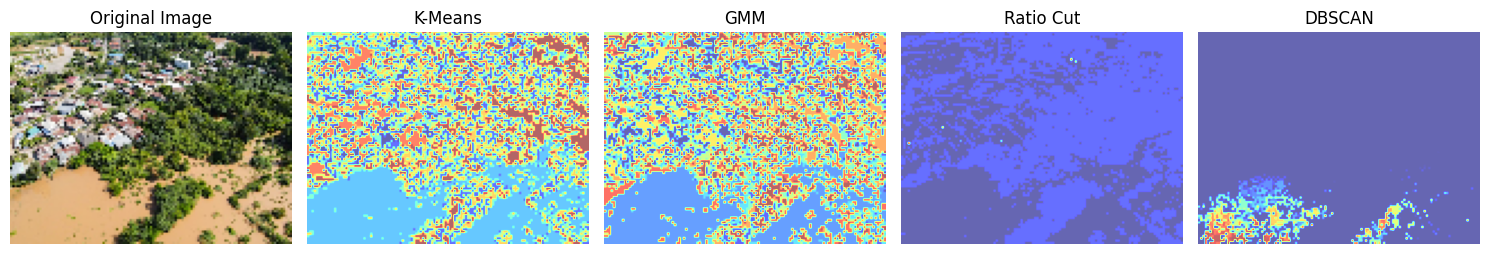

In [11]:

def plot_comparison(original, masks, titles):
    fig, axs = plt.subplots(1, len(masks) + 1, figsize=(15, 5))
    axs[0].imshow(original)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    for i, mask in enumerate(masks):
        axs[i + 1].imshow(mask, cmap='jet', alpha=0.6)
        axs[i + 1].set_title(titles[i])
        axs[i + 1].axis('off')

    plt.tight_layout()
    plt.show()

masks = [
    labels_kmeans.reshape(image_np.shape[0], image_np.shape[1]),
    labels_gmm.reshape(image_np.shape[0], image_np.shape[1]),
    labels_ratio_cut.reshape(image_np.shape[0], image_np.shape[1]),
    labels_dbscan.reshape(image_np.shape[0], image_np.shape[1])
]
titles = ["K-Means", "GMM", "Ratio Cut", "DBSCAN"]
plot_comparison(image_np, masks, titles)


### **Ploting 3D Clusters of Color Data with Clustering Labels**

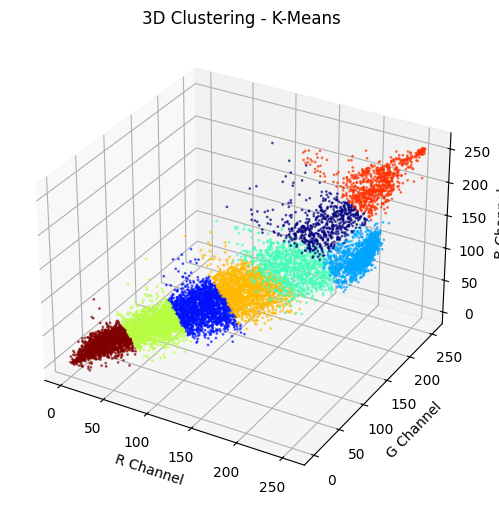

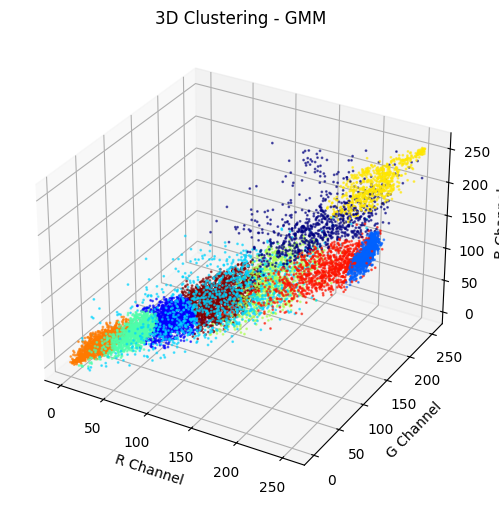

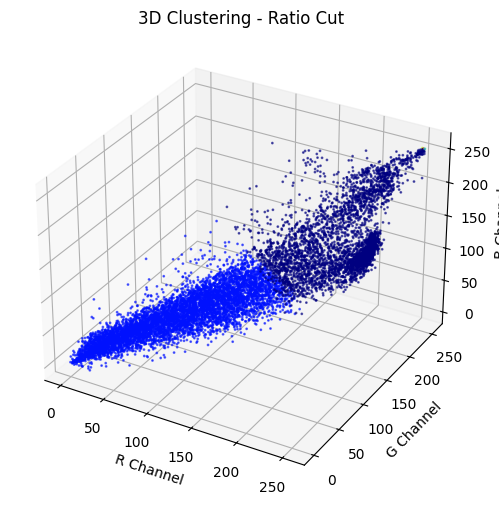

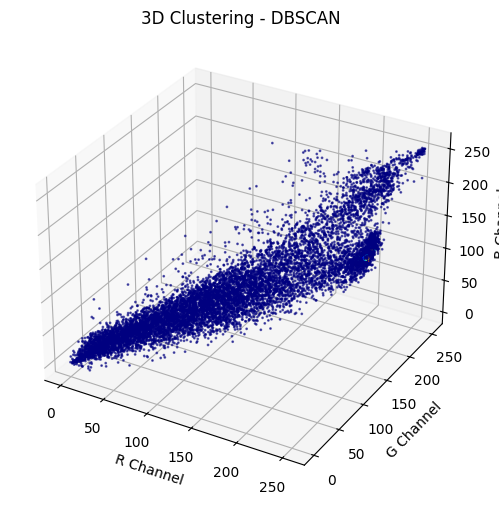

In [12]:


def plot_3d_clusters(data, labels, title):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, s=1, cmap='jet', alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel('R Channel')
    ax.set_ylabel('G Channel')
    ax.set_zlabel('B Channel')
    plt.show()


plot_3d_clusters(vectorized, labels_kmeans, "3D Clustering - K-Means")
plot_3d_clusters(vectorized, labels_gmm, "3D Clustering - GMM")
plot_3d_clusters(vectorized, labels_ratio_cut, "3D Clustering - Ratio Cut")
plot_3d_clusters(vectorized, labels_dbscan, "3D Clustering - DBSCAN")


### **Ploting Silhouette Analysis for Clustering Algorithms**

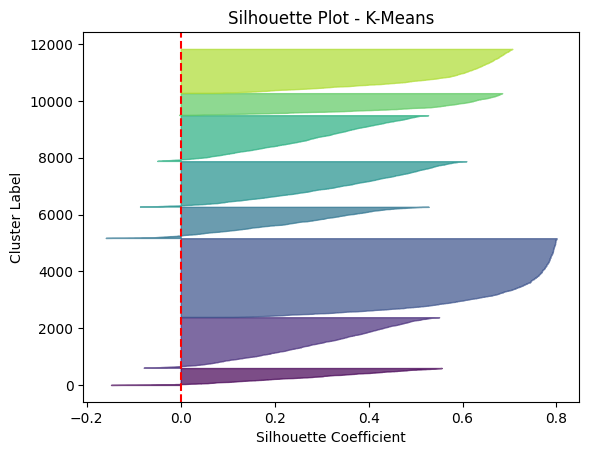

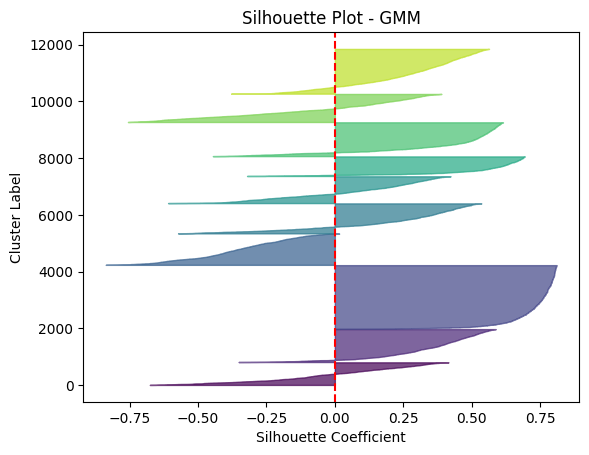

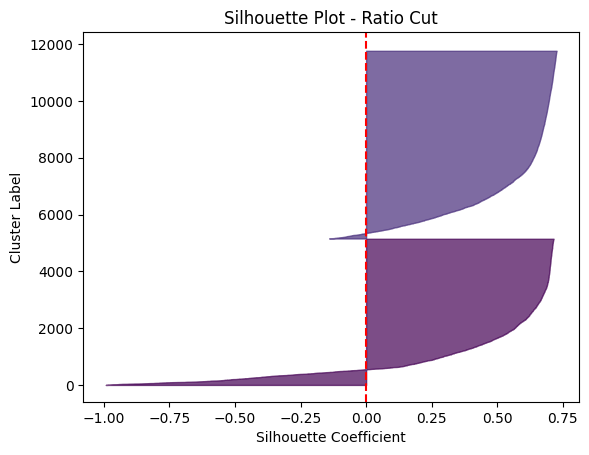

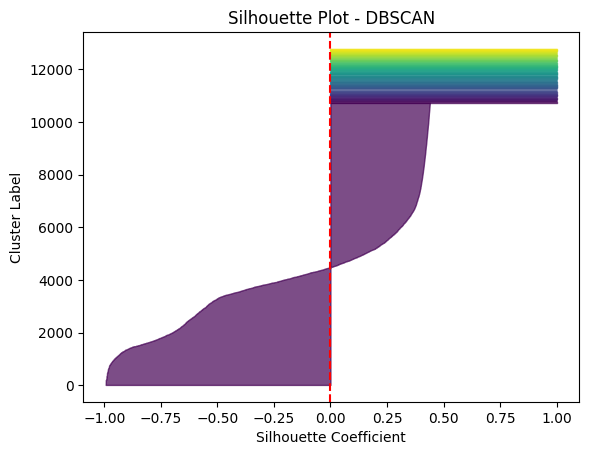

In [13]:


def plot_silhouette(labels, data, title):
    silhouette_vals = silhouette_samples(data, labels)
    y_lower = 10
    unique_labels = np.unique(labels)

    for i in unique_labels:
    
        ith_cluster_silhouette_values = silhouette_vals[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.viridis(i / len(unique_labels))

        plt.fill_betweenx(np.arange(y_lower, y_upper),
                           0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.7)
        
        y_lower = y_upper + 10  

    plt.title(f'Silhouette Plot - {title}')
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster Label')
    plt.axvline(0, linestyle='--', color='red')
    plt.show()

plot_silhouette(labels_kmeans, vectorized, "K-Means")
plot_silhouette(labels_gmm, vectorized, "GMM")
plot_silhouette(labels_ratio_cut, vectorized, "Ratio Cut")
plot_silhouette(labels_dbscan, vectorized, "DBSCAN")
